In [96]:
# pipenv install pandas plotly matplotlib statsmodels nbformat ipykernel scikit-learn ipywidgets sweetviz flask pydantic pyarrow Flask-Pydantic

# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimizar os Hiperparâmetros
import optuna

In [97]:
# Carregar 
df_obesidade = pd.read_csv('./datasets/dataset_obesidade.csv')

In [98]:
# Mostrar os primeiros registros do Dataframe
df_obesidade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [99]:
# Mostrar os últimos registros do Dataframe
df_obesidade.tail(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [100]:
# Mostrar os dados da DF
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [101]:
# Converter colunas para o tipo inteiro
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype(int)

In [102]:
# Detectar valores ausentes
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obesidade                              0
dtype: int64

### EDA

In [103]:
# Distribuição da Variável Target - Obesidade
px.bar(df_obesidade.value_counts('Obesidade'))

In [104]:
px.bar(df_obesidade.value_counts('Obesidade') / len(df_obesidade) * 100)

In [105]:
# Analise Univariada - Idade
px.histogram(df_obesidade, x='Idade')

In [106]:
# Analise Univariada - Idade
px.box(df_obesidade, y='Idade')

In [107]:
# Analize Univariada - Gênero
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [108]:
# Analize Univariada - Historico Obesidade na Familia
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [109]:
# Analize Univariada - Nivel Atividade Fisica
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [110]:
# Analise Univariada - Nível de Uso de Tela
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [111]:
# FOrmulação de Hipótese
# Faixa Etária influencia em Obesidade
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [112]:
# Bucketing de Idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(x=df_obesidade['Idade'], bins=bins, labels=labels_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(x=df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest=True)

In [113]:
df_obesidade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1


In [114]:
# Criar uma tabela de Contingencia - Faixa etária e Obesidade
tabela_contingencia_faixa_etária = sm.stats.Table.from_data(df_obesidade[['Obesidade', 'Faixa_Etaria_String']])

In [115]:
tabela_contingencia_faixa_etária.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obesidade,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [116]:
# Teste de Chi-Square de Pearson
print(tabela_contingencia_faixa_etária.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [117]:
# p_value < 0.05, rejeitamos H0, portanto as variáveis não são independentes

In [118]:
# Automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obesidade')

                                             |          | [  0%]   00:00 -> (? left)


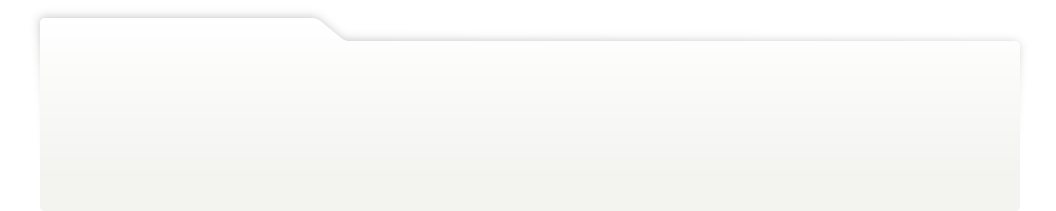
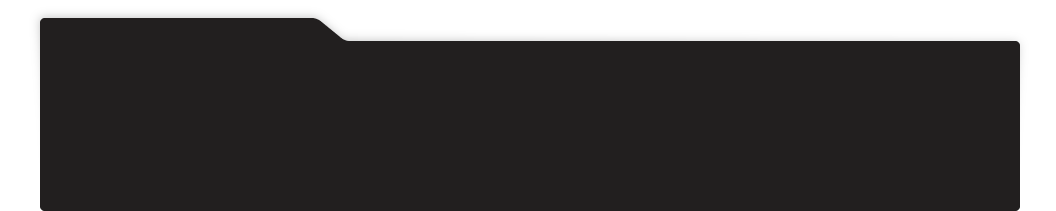
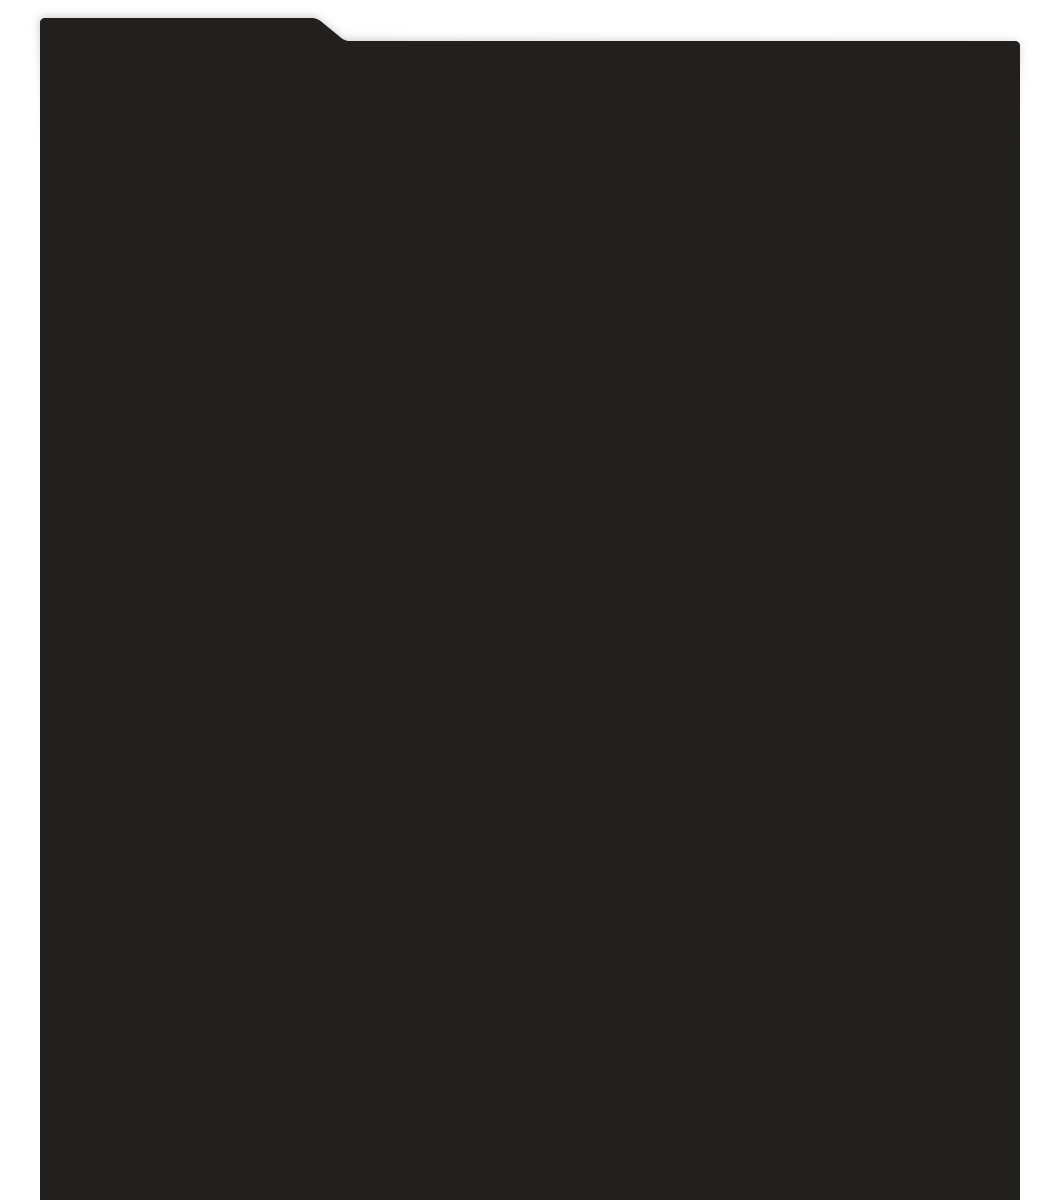
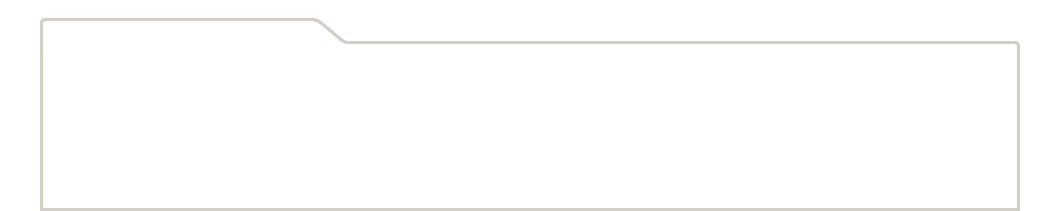
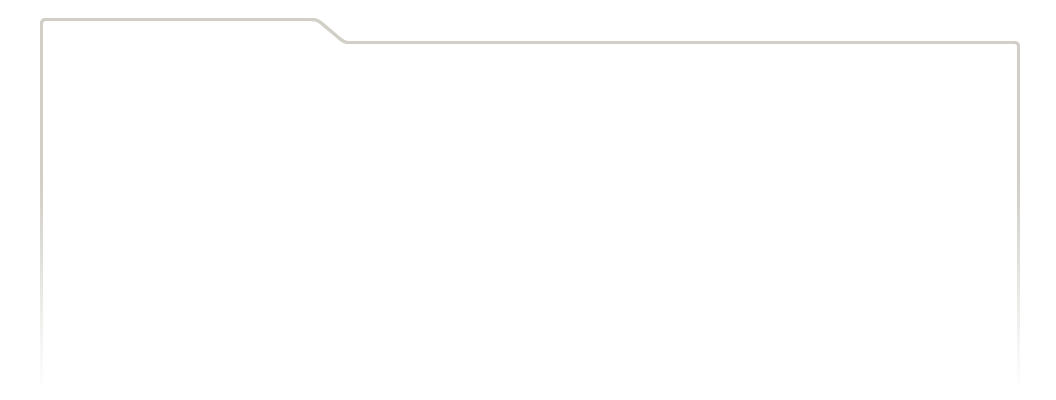
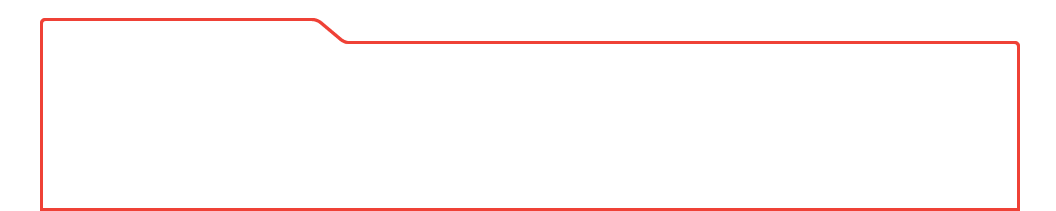
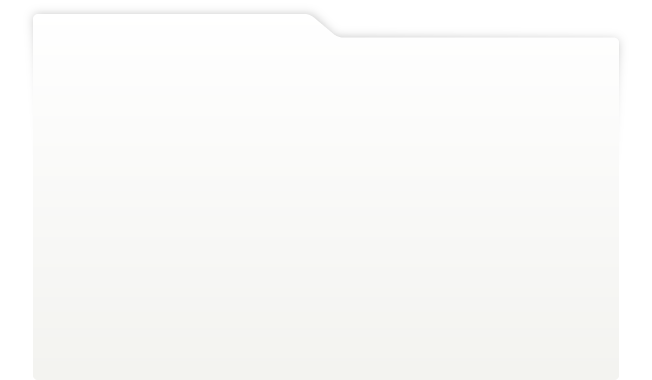
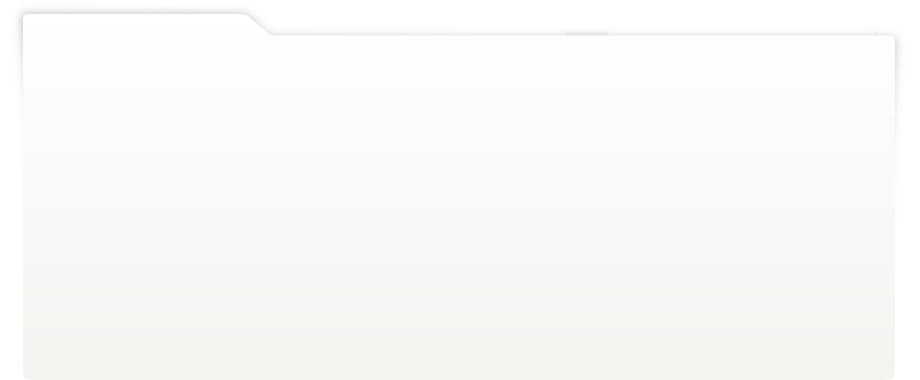
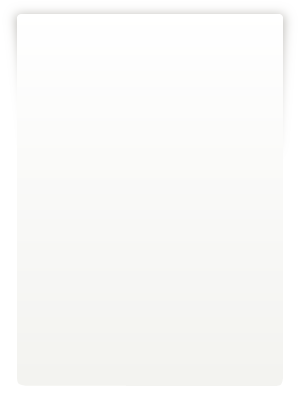
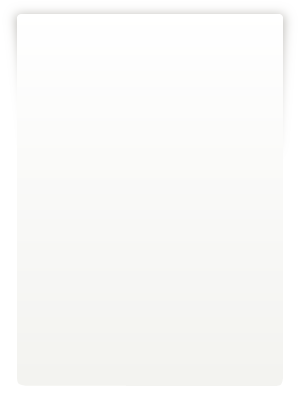
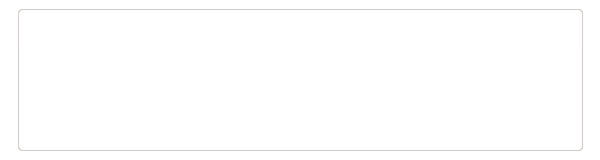
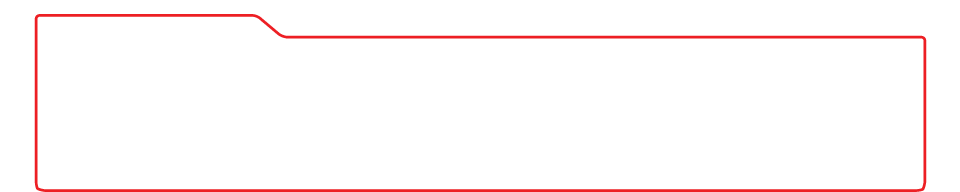
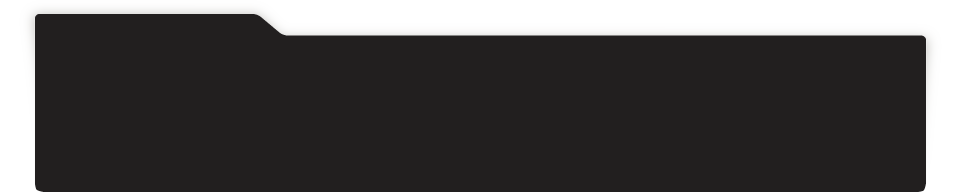
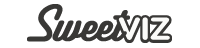
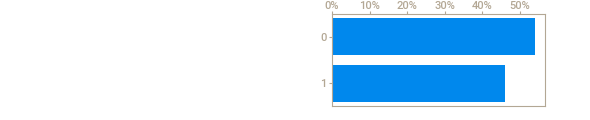
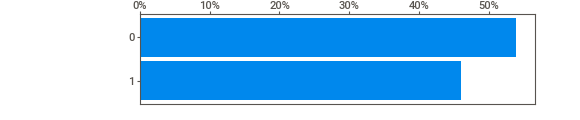
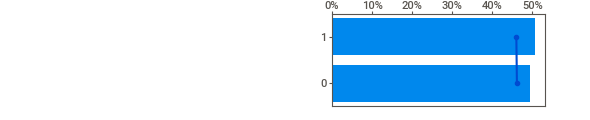
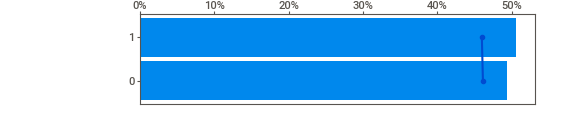
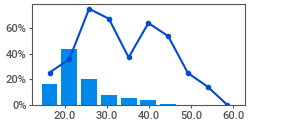
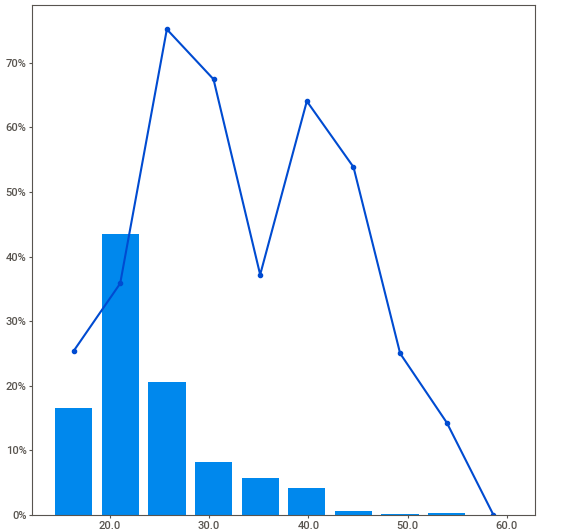
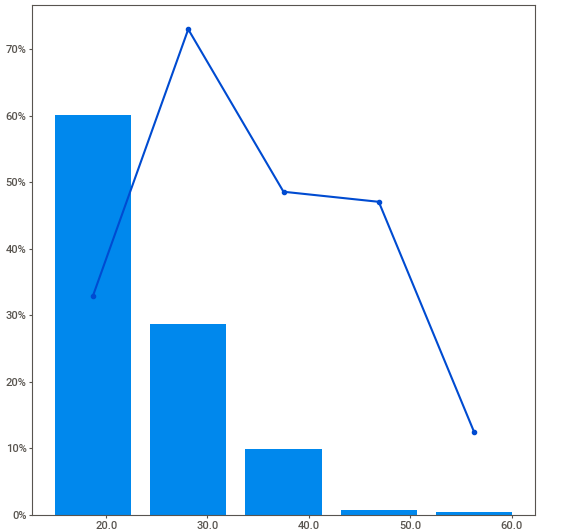
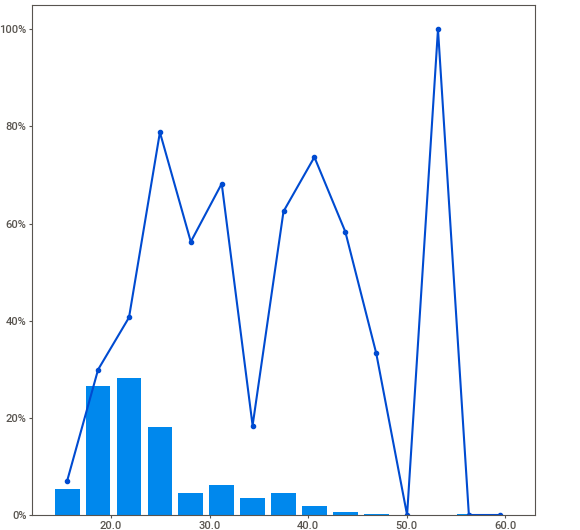
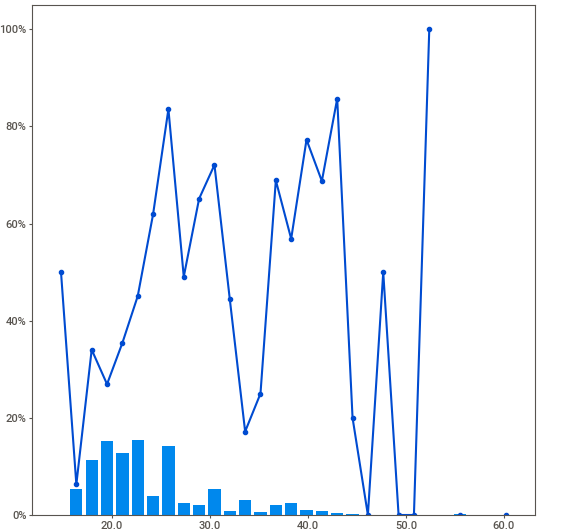
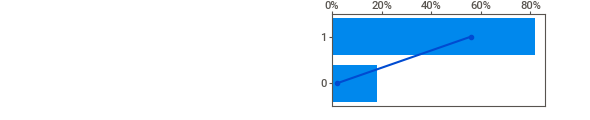
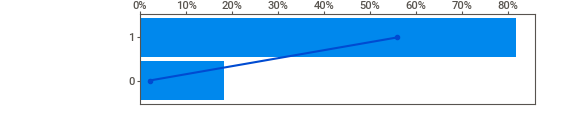
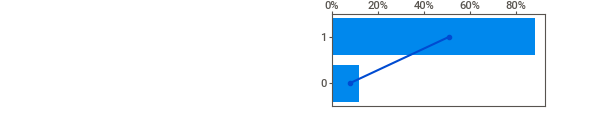
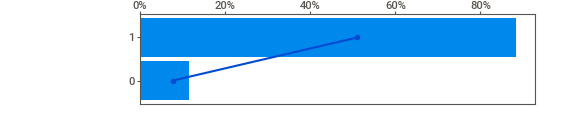
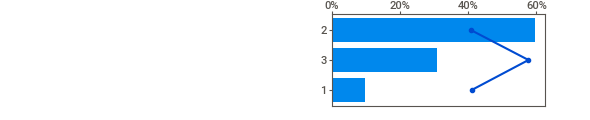
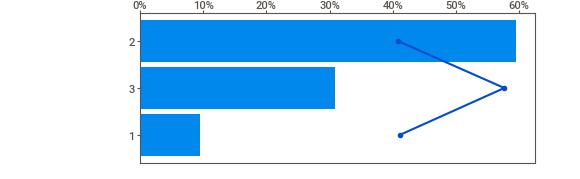
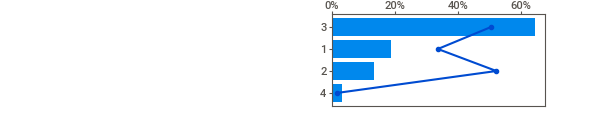
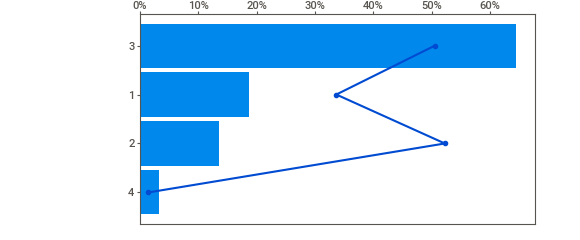
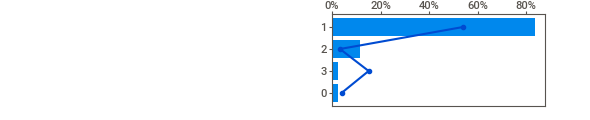
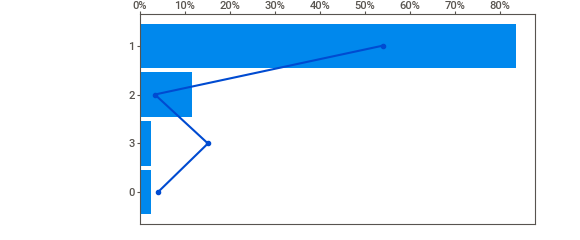
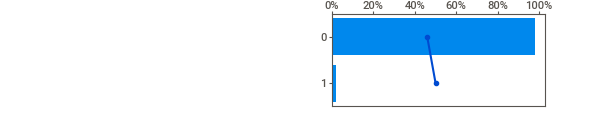
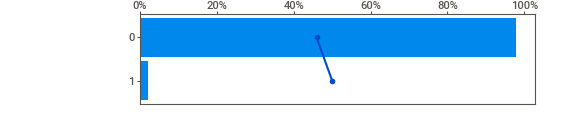
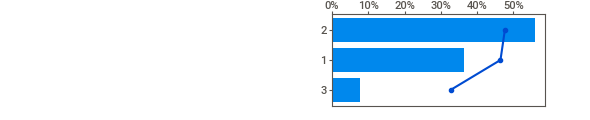
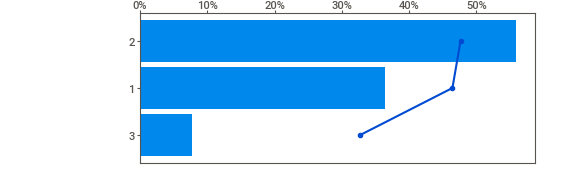
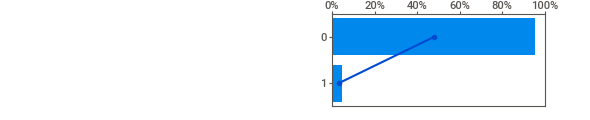
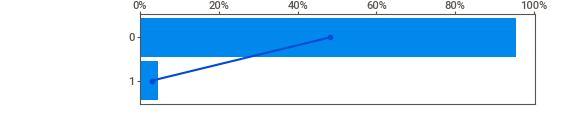
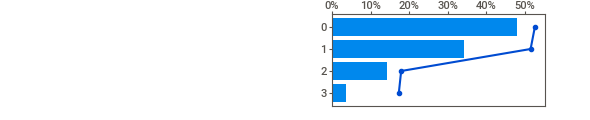
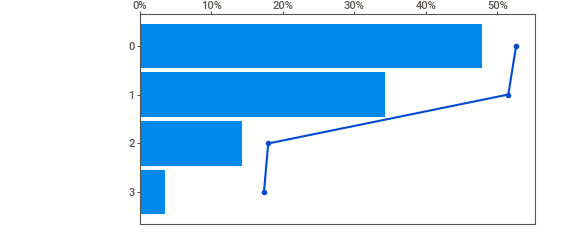
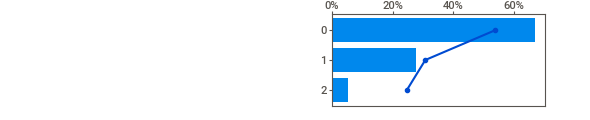
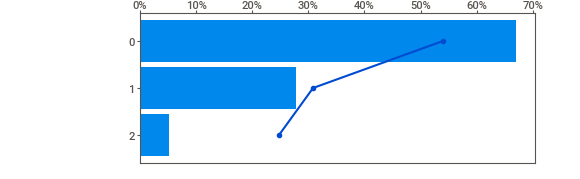
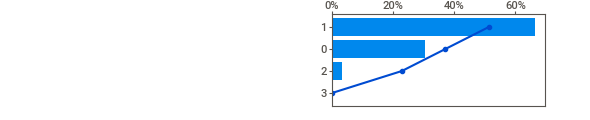
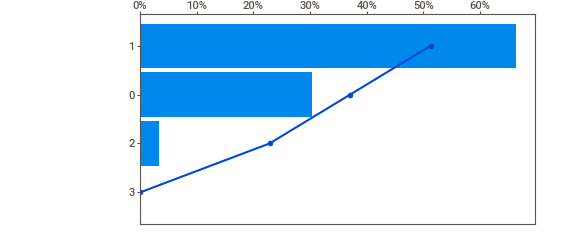
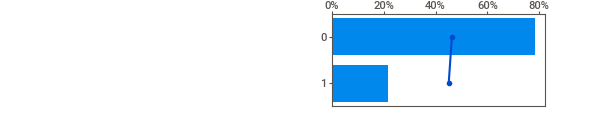
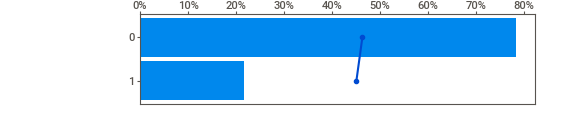
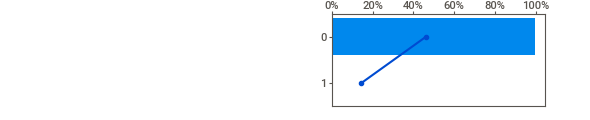
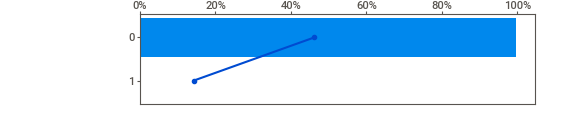
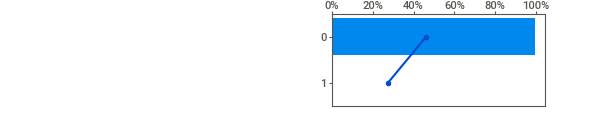
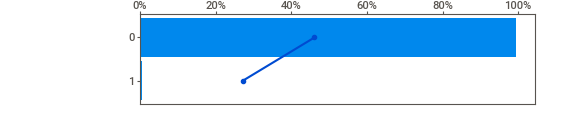
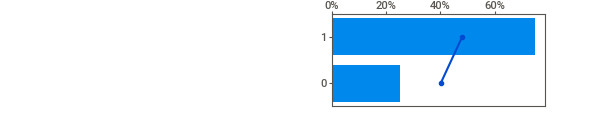
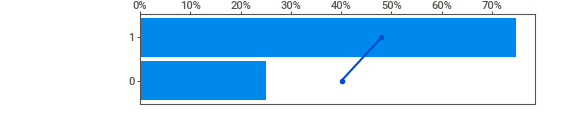
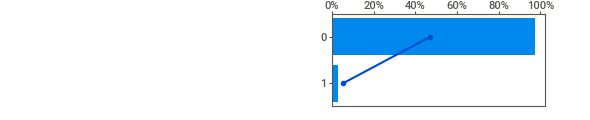
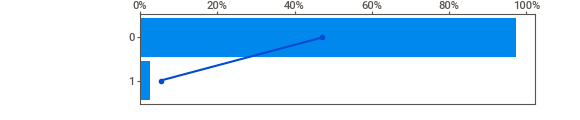
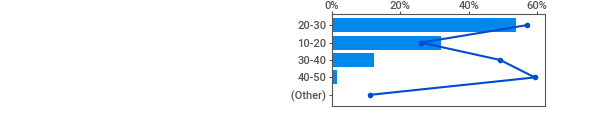
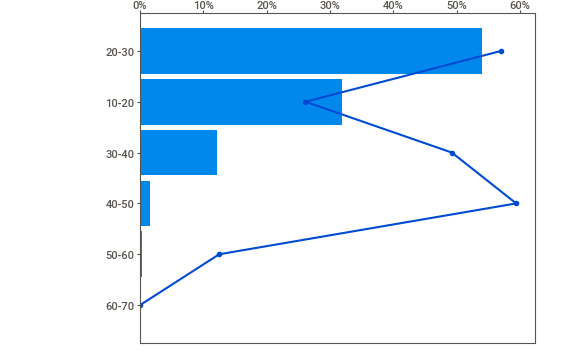
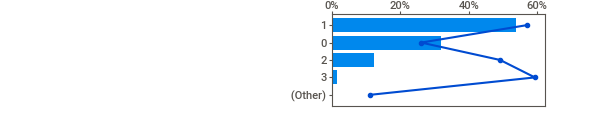
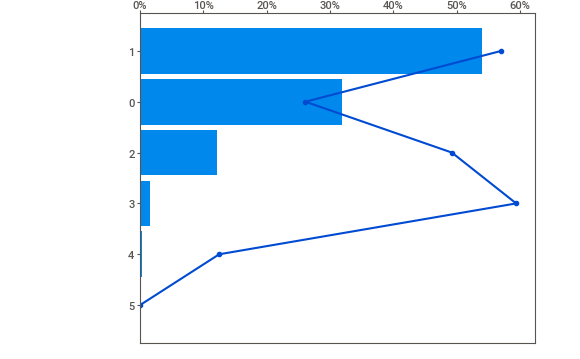
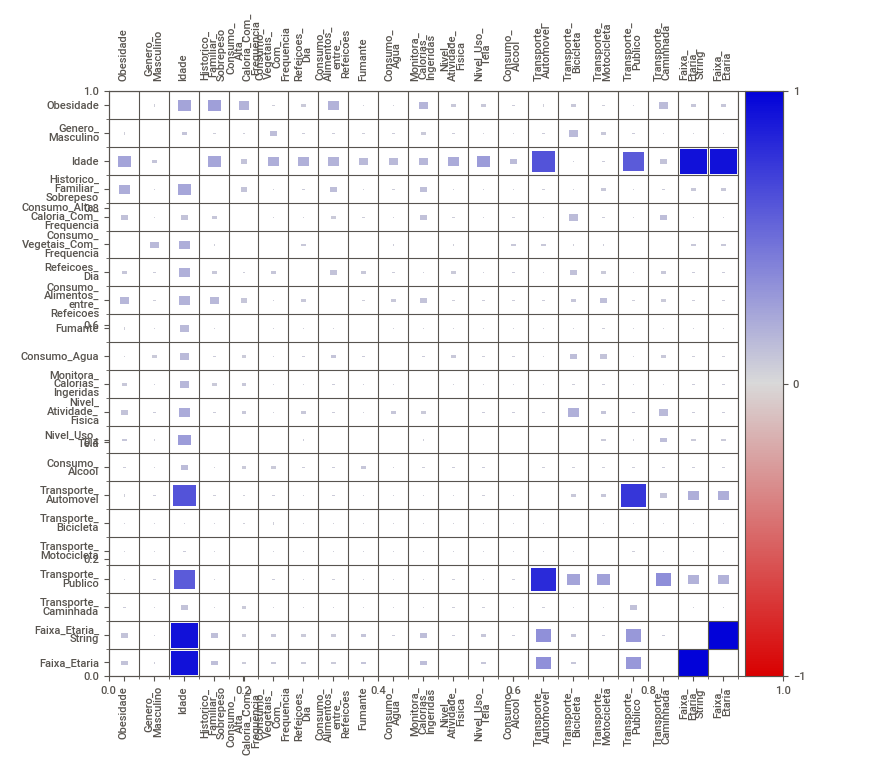
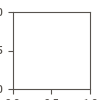

In [119]:
sv_obesidade_report.show_notebook()

### Treinamento do Modelo - Baseline

In [120]:
# Dividir Dados de Treino e Teste
X = df_obesidade.drop(columns=['Obesidade', 'Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obesidade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [121]:
# Treinamento do Modelo
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

### Métricas Modelo Baseline

In [122]:
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [123]:
# Avaliando o desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')

print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


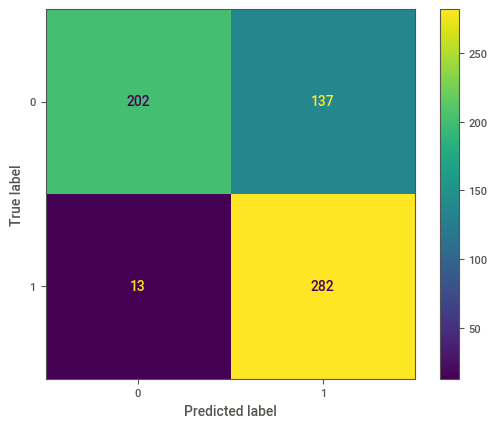

In [124]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

### Treinamento Modelo - Automated Feature Selection

In [125]:
# Select KBest - Seleciona as K melhores features, baseado em um teste
kbest = SelectKBest(score_func=chi2, k=8)

In [126]:
kbest

SelectKBest(k=8, score_func=<function chi2 at 0x0000014672B4C900>)

In [127]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [128]:
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [129]:
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int32   
 5   Nivel_Uso_Tela                       1477 non-null   int32   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int32(2), int64(5)
memory usage: 82.4 KB


In [130]:
kbest_features

array([ 1,  2,  5,  8,  9, 10, 16, 17], dtype=int64)

In [131]:
# Treinar Modelo com melhores features
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_best_features, y_train)

GaussianNB()

### Métricas Modelo Baseline KBest

In [132]:
# Filtrar as Features nos dados de testes
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [133]:
y_pred_kbest = modelo_kbest.predict(X_test_best_features)

In [134]:
# Predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [135]:
# Avaliando o desempenho do modelo
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')

print(f'Relatório de Classificação (KBest):\n{classification_report_str}')
print(f'Recall (KBest):\n{recall_baseline}')

Relatório de Classificação (KBest):
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall (KBest):
0.775901204939753


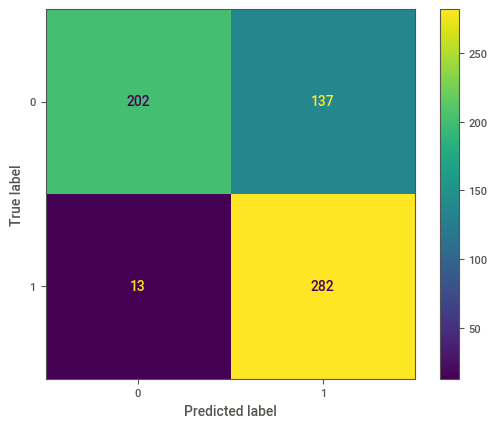

In [136]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

### Tuning de Hiperparâmetros

In [137]:
# Ajustar hiperparametros do SelectKBest
# k = k melhores features conforme chi2

def naivebayes_optuna(trial):
    k = trial.suggest_int('k', 1, 18)

    kbest = SelectKBest(score_func=chi2, k=k)
    
    X_train_kbest = kbest.fit_transform(X_train, y_train)

    kbest_features = kbest.get_support(indices=True)
    X_train_best_features = X_train.iloc[:, kbest_features]

    # Treinar modelo com melhores features
    modelo_kbest_optuna = GaussianNB()
    modelo_kbest_optuna.fit(X_train_best_features, y_train)

    # Aplicar o seletor de features no conjunto de testes
    X_test_kbest = kbest.transform(X_test)
    X_test_best_features = X_test.iloc[:, kbest_features]

    # Predizer valores
    y_pred_kbest = modelo_kbest_optuna.predict(X_test_best_features)

    # Avaliar Recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')

    return k, recall_optuna


In [138]:
# Rodar o estudo dos hiperparâmetros
search_space = { 'k': range(1, 19) }
estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naivebayes.optimize(naivebayes_optuna, n_trials=50)

[I 2025-04-03 22:08:15,059] A new study created in memory with name: no-name-e1fe811e-3021-4a41-b345-86384268451e
[I 2025-04-03 22:08:15,078] Trial 0 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}.
[I 2025-04-03 22:08:15,097] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}.
[I 2025-04-03 22:08:15,116] Trial 2 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}.
[I 2025-04-03 22:08:15,133] Trial 3 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}.
[I 2025-04-03 22:08:15,150] Trial 4 finished with values: [15.0, 0.7742062896855157] and parameters: {'k': 15}.
[I 2025-04-03 22:08:15,168] Trial 5 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}.
[I 2025-04-03 22:08:15,185] Trial 6 finished with values: [3.0, 0.6138143092845358] and parameters: {'k': 3}.
[I 2025-04-03 22:08:15,202] Trial 7 finished with values: [17.0, 0.775901204939753] and parameters: {'k': 17}.
[I 

In [139]:
# Mostrar melhor resultado
trial_com_melhor_recall = max(estudo_naivebayes.best_trials, key=lambda t: t.values[1])
print("Trial com maior recall e menor k: ")
print(f'\ttrail number: {trial_com_melhor_recall.number}')
print(f'\tparam (k): {trial_com_melhor_recall.params}')
print(f'\tvalues (k, recall): {trial_com_melhor_recall.values}')

Trial com maior recall e menor k: 
	trail number: 10
	param (k): {'k': 8}
	values (k, recall): [8.0, 0.780105994700265]


In [140]:
# Mostrar Chart com Trials
fig = optuna.visualization.plot_pareto_front(estudo_naivebayes)
fig.show()

### Salvar modelo

In [141]:
import joblib

# Salvar modelo
joblib.dump(modelo_kbest, 'modelo_obesidade.pkl')

['modelo_obesidade.pkl']